**Необходимо проанализировать данные из файла. Результатом анализа является набор инсайтов, полученных на основе данных, которые могут быть полезны/интересны бизнесу \
(например, ТОП товары/категории по различным регионам; зависимость типов оплаты от региона и др). \
Данные примеры не являются обязательными и записаны лишь с целью демонстрации возможных направлений поиска.**

## Part 1. EDA

In [8]:
import pandas as pd

Так как столбцов больше 20 для корректного отображения включим следующие свойства

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [10]:
orders_df = pd.read_csv('D:/Datasets/Orders.csv')
orders_df.head()

C:\Users\denis\AppData\Local\Temp\ipykernel_10580\1549350568.py:1: DtypeWarning: Columns (4,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv('D:/Datasets/Orders.csv')


,receiptid,kkt_sn,d_date,name,amount,unit,price,cost,nal,electron,avans,credit,vstrechpredst,Тип региона,Имя региона,Тип города,Имя города,Тип улицы,Имя улицы,Тип номера дома,Номер дома
0,61379295,108200088416,2018-06-07,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,450.0,450.0,450.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
1,61379296,108200088416,2018-06-07,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,360.0,360.0,360.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
2,61379301,108200088416,2018-06-07,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,250.0,250.0,250.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
3,61429416,108200088416,2018-06-08,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,1500.0,1500.0,1500.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""
4,61431313,108200088416,2018-06-08,0001 ДЕТСКИЙ ТРИКОТАЖ,1.0,--,1870.0,1870.0,1870.0,0.0,0.0,0.0,0.0,обл,Новосибирская,г,Чулым,ул,Кооперативная,дом,"""=""""17"""""""


In [11]:
orders_df.shape

(10000000, 21)

Выведем информацию о столбцах и их типах (типы присвоились автоматически)

In [13]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 21 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   receiptid        int64 
 1   kkt_sn           int64 
 2   d_date           object
 3   name             object
 4   amount           object
 5   unit             object
 6   price            object
 7   cost             object
 8   nal              object
 9   electron         object
 10  avans            object
 11  credit           object
 12  vstrechpredst    object
 13  Тип региона      object
 14  Имя региона      object
 15  Тип города       object
 16  Имя города       object
 17  Тип улицы        object
 18  Имя улицы        object
 19  Тип номера дома  object
 20  Номер дома       object
dtypes: int64(2), object(19)
memory usage: 1.6+ GB


Найдем за какой период у нас данные

In [46]:
print(orders_df["d_date"].min(), orders_df["d_date"].max())

2018-06-01 00:00:00 2018-08-01 00:00:00


Заменим некорретные значения "--" на 0

In [14]:
orders_df["amount"] = orders_df['amount'].replace("--", 0)
orders_df["price"] = orders_df['price'].replace("--", 0)
orders_df["cost"] = orders_df['cost'].replace("--", 0)
orders_df["nal"] = orders_df['nal'].replace("--", 0)
orders_df["electron"] = orders_df['electron'].replace("--", 0)
orders_df["avans"] = orders_df['avans'].replace("--", 0)
orders_df["credit"] = orders_df['credit'].replace("--", 0)

In [88]:
Столбец orders_df["vstrechpredst"] нам не понадобится, удалим его

In [16]:
orders_df = orders_df.drop('vstrechpredst',1)

C:\Users\denis\AppData\Local\Temp\ipykernel_10580\1063139158.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  orders_df = orders_df.drop('vstrechpredst',1)


In [ ]:
Поменяем типы столбцов

In [20]:
orders_df["receiptid"] = orders_df["receiptid"].astype('object')
orders_df["d_date"] = orders_df["d_date"].astype('datetime64')
orders_df["amount"] = orders_df["amount"].astype('float64')
orders_df["price"] = orders_df["price"].astype('float64')
orders_df["cost"] = orders_df["cost"].astype('float64')
orders_df["nal"] = orders_df["nal"].astype('float64')
orders_df["electron"] = orders_df["electron"].astype('float64')
orders_df["avans"] = orders_df["avans"].astype('float64')
orders_df["credit"] = orders_df["credit"].astype('float64')
orders_df.dtypes

receiptid                  object
kkt_sn                      int64
d_date             datetime64[ns]
name                       object
amount                    float64
unit                       object
price                     float64
cost                      float64
nal                       float64
electron                  float64
avans                     float64
credit                    float64
Тип региона                object
Имя региона                object
Тип города                 object
Имя города                 object
Тип улицы                  object
Имя улицы                  object
Тип номера дома            object
Номер дома                 object
dtype: object

Посмотрим характеристики непрерывных переменнных

In [23]:
orders_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,kkt_sn,amount,price,cost,nal,electron,avans,credit
count,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00,10000000.00
mean,108224373632.11,2.99,1432.59,83950115617593971947224594485726905345507328.00,1309.50,640.91,4.35,4.62
std,121302741.23,108.60,51970.47,228452238377687248103386182166425838324061044736.00,35177.65,40705.05,4469.52,1986.56
min,106205547977.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,108202811399.00,1.00,50.00,54.00,14.00,0.00,0.00,0.00
50%,108205829488.00,1.00,128.00,135.00,100.00,0.00,0.00,0.00
75%,108208147855.00,1.00,378.00,382.00,322.00,0.00,0.00,0.00
max,108490000073.00,77688.00,39224660.00,710889011641256192623472250234667646895057650319360.00,38272008.00,39224660.00,12034000.00,6100000.00


Найдем уникальные названия продуктов

In [108]:
orders_df.name.drop_duplicates()

0                   0001 ДЕТСКИЙ ТРИКОТАЖ
406                 0002 Продукты питания
1553                           0002 Товар
1557        0001 СТОМАТОЛОГИЧЕСКАЯ УСЛУГА
1781                        0001 ПРОДУКТЫ
                        ...              
9995225         0002 ДОСТАВКА НН->СЕМЕНОВ
9995227         0001 ДОСТАВКА СЕМЕНОВ->НН
9995233                 0001 косметология
9995234    0001 УСЛУГИ ПРОПУСКНОГО РЕЖИМА
9997724       0001 ОЗДОРОВИТЕЛЬНЫЙ МАССАЖ
Name: name, Length: 106641, dtype: object

Посмотрим как часто встречаются те или иные наименования продуктов

In [109]:
orders_df.name.value_counts()

0001 ТОВАР                                             2021722
0001                                                    302833
0001 Товар                                              269016
0001 ПРОДУКТЫ                                           232058
0001 ХЛЕБО-БУЛОЧНЫЕ ИЗДЕЛИЯ                             148395
                                                        ...   
Термоэтикетки 30*20*1800 ТОП                                 1
Консультационные услуги по снятию ККТ с регистрации          1
Шифрование\Упаковка\подготовка файла                         1
Формирование справочника контрагентов (ед.)                  1
0052 Philip Morris Blue                                      1
Name: name, Length: 106641, dtype: int64

Как часто встречаются те или иные единицы измерения

In [33]:
orders_df['unit'].value_counts()

--           7966561
штука         904139
шт            357436
килограмм     293734
кг            257180
              ...   
Гкал               1
бут                1
п.м                1
Г                  1
400 г              1
Name: unit, Length: 142, dtype: int64

7966561 раз встречается "--" - данное значение ни на что менять не будем, так как это не влияет на дальнейшие вычисления

In [32]:
orders_df['Тип региона'].value_counts()

обл     5687645
край    2050064
Респ    1265452
г        679130
0        272692
АО        23404
Аобл        578
Name: Тип региона, dtype: int64

Необходимо удалить все строки в которых значение 'Тип региона' = 0, пока мы не узнаем к какому региону относятся данные строки

In [38]:
orders_df = orders_df[orders_df['Тип региона'] != "0"]

In [39]:
orders_df['Тип региона'].value_counts()

обл     5687645
край    2050064
Респ    1265452
г        679130
АО        23404
Аобл        578
Name: Тип региона, dtype: int64

## **Part 2. Визуализация**

Power BI автоматически выделил 41 строку с некорректными значениями

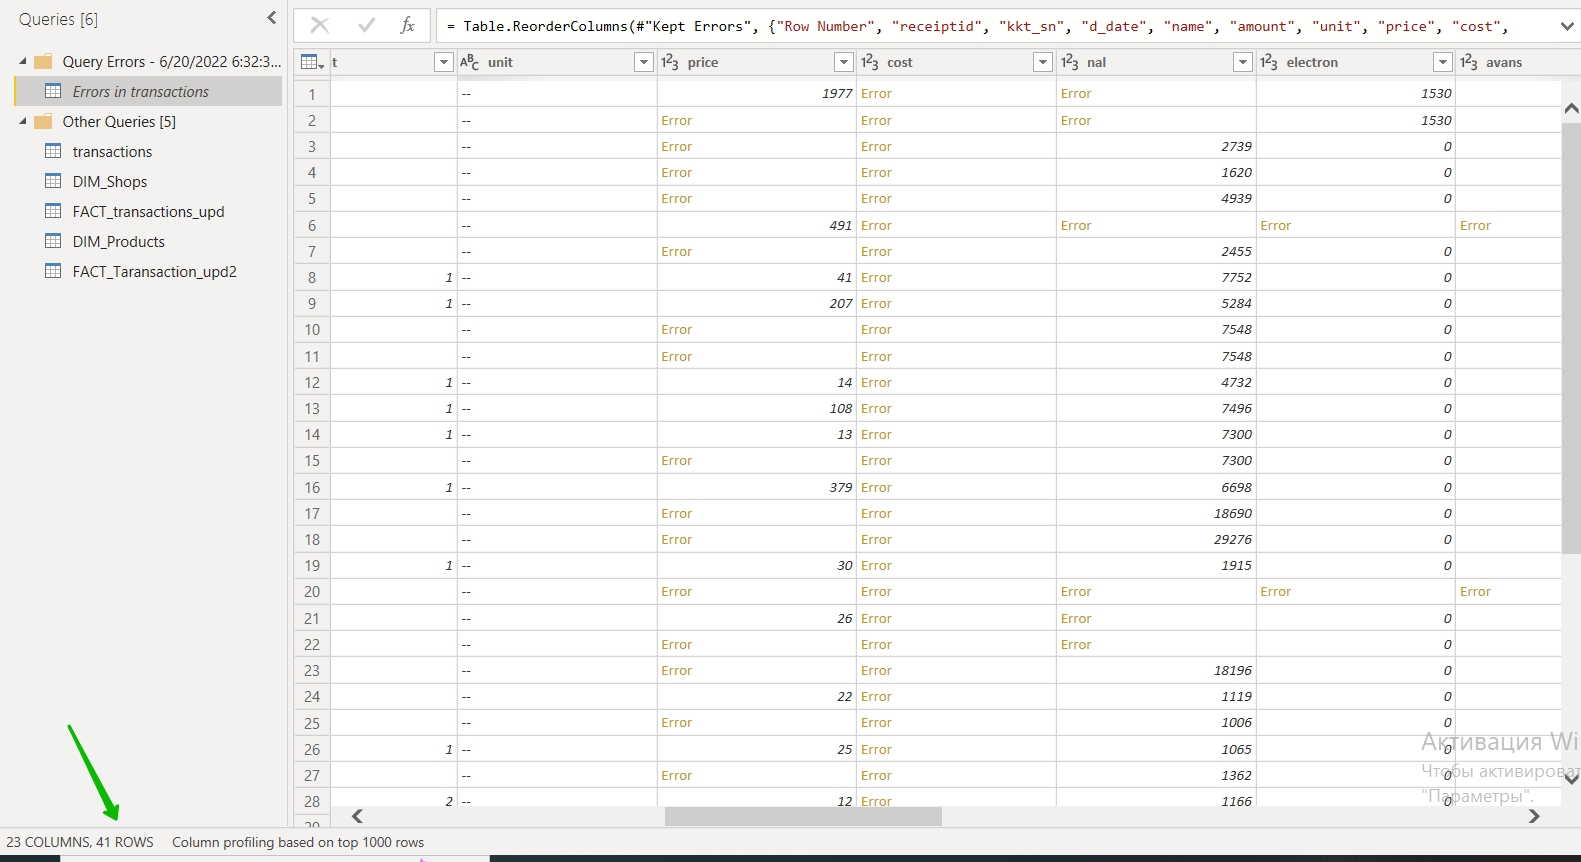

Для оптимизации работы с данными я выделил:
    таблицу фактов: FACT_Transaction
    таблицы измерений: DIM_Shops, DIM_Products, Calendar
        
Исходный файл данных весил 2+гб, моя табл. фактов весит 800Мб, так как текстовые значения названий продуктов, регионов,улиц, домов - вынесены в справочники. А в таблице фактов только ссылки на них

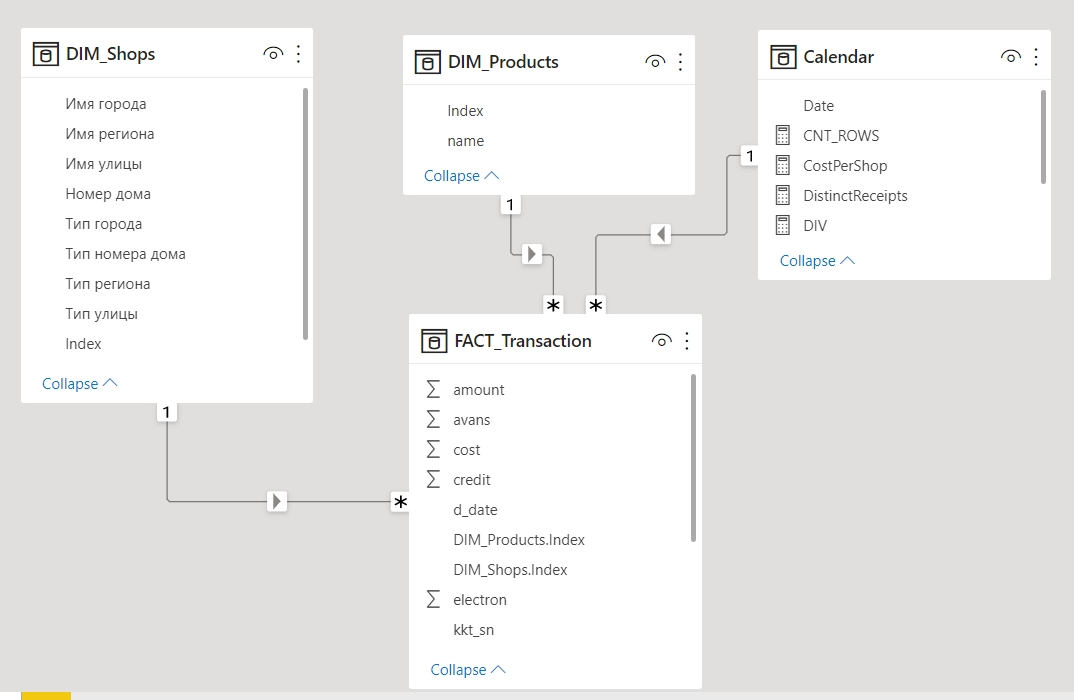

Сверху вниз, слева направо:\
**Продажи по регионам:** \
Несмотря на то, что лидер по продажам Москва, в Приморском крае самые большие продажи в пересчете на 1 один магазин.\
В худшую сторону выделяется Краснодар - имея самое большое количество магазинов и ККТ, по продажам на 1 магазин - только 10ое место;\
**По типу оплаты:** \
Наличные чаще использовались чем карточки.\
**Объем кредитов по регионам:**\
С отрывом лидируют три региона. \
**Продажи по дням:**\
В июле объем продаж заметно ниже чем в июне (может быть связано с началом отпусков). \
В первых числах июлях резкий спад продаж (во многих регионах до нуля) на фоне предшествующих максимальных продаж (закрытие магазинов на учет, ремонт) \
Обший тренд продаж негативный. 

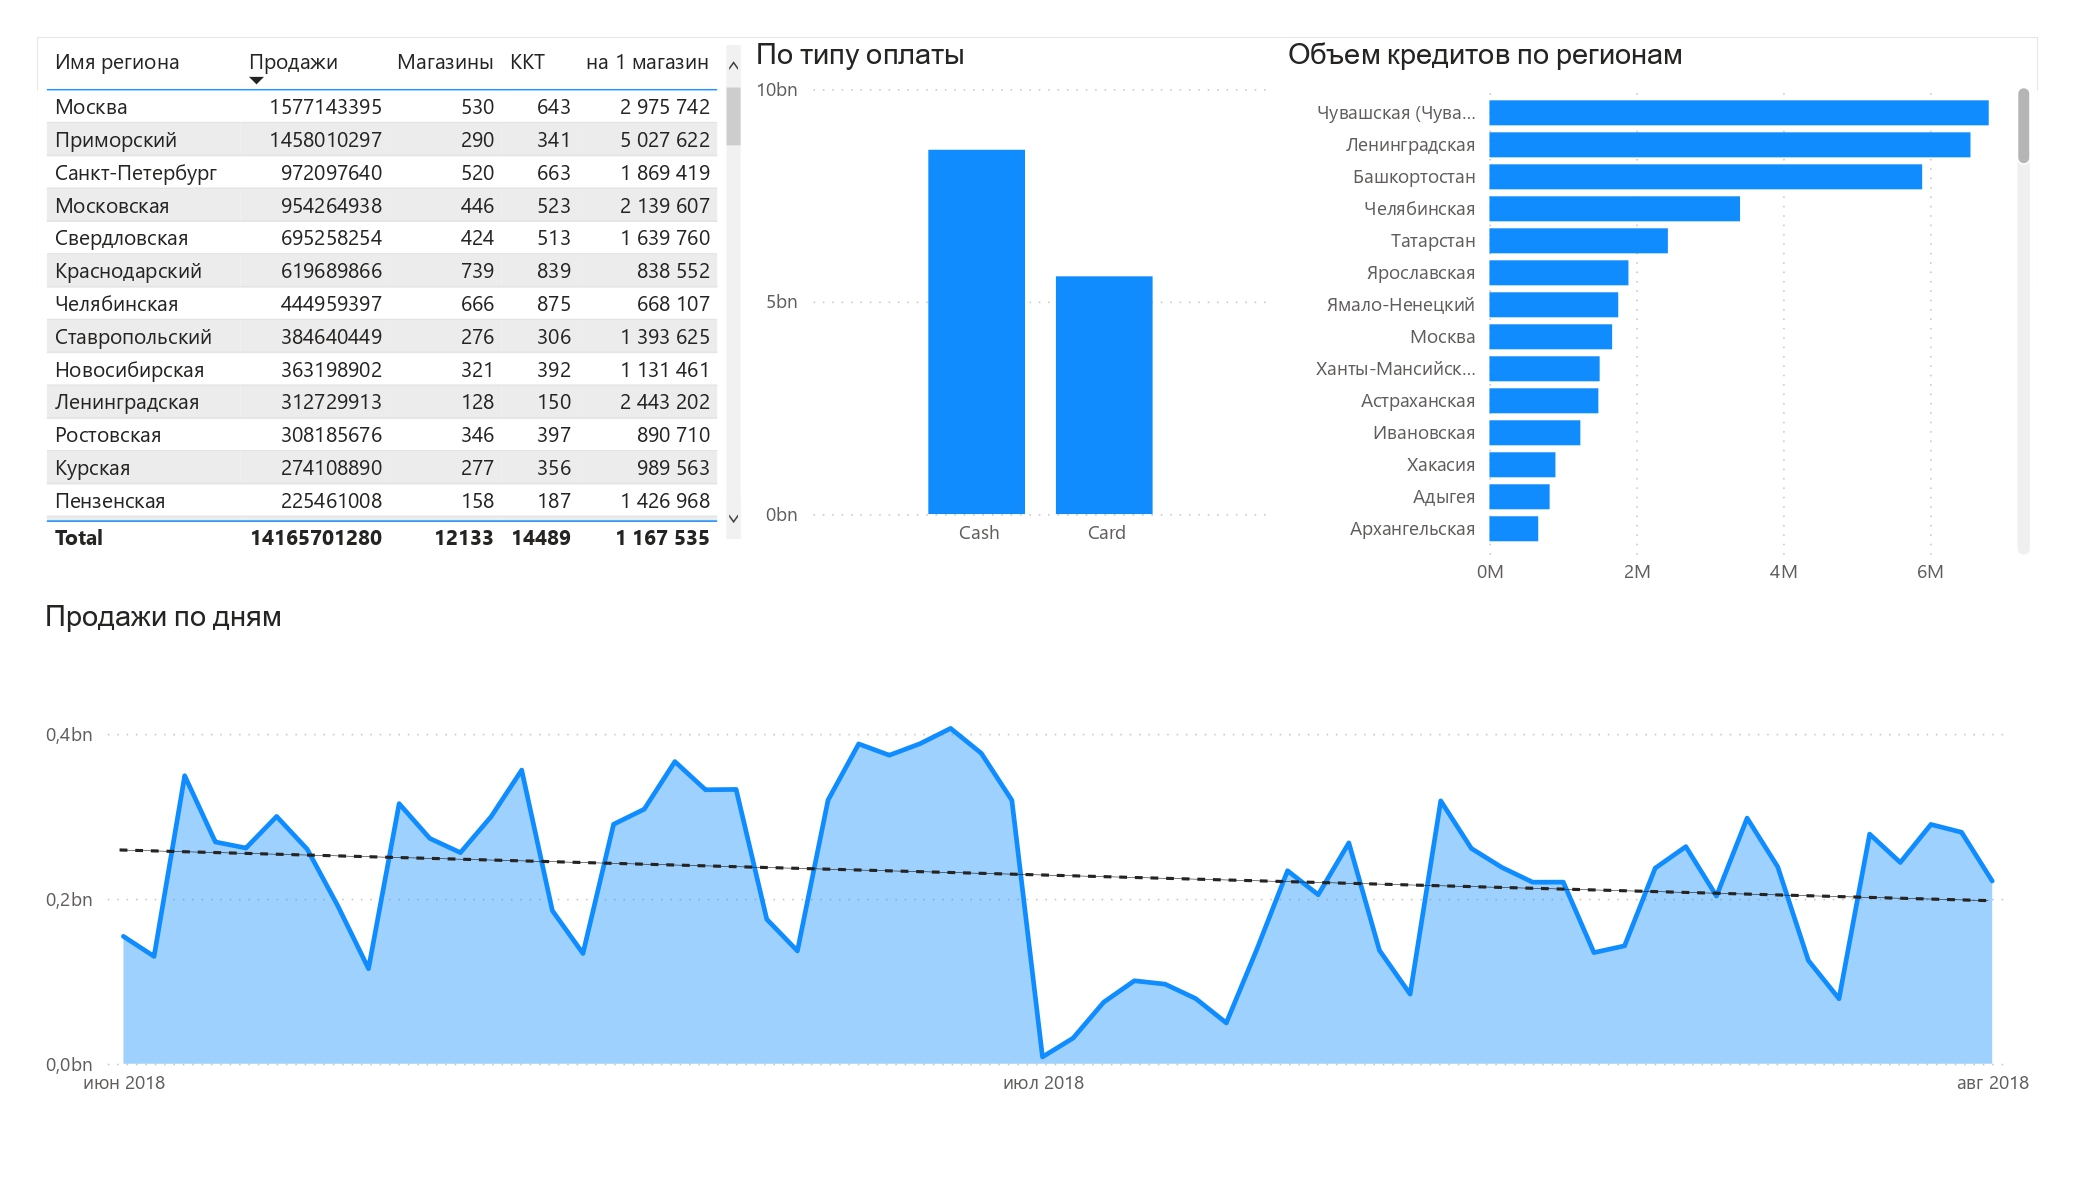

Заметим, что хоть Москва и лидер по объему продаж в рублях, но по количеству проданного в штуках в лидерах Владимирская область (следовательно цены в Москве выше). \
Рассмотрим для примера как распределялись продажи по Владимирской области.
Судя по графику можно предположить, что на улице Октябрьской находится гипермаркет, а на других улицах расположены магазины шаговой доступности/маленькой площади. \
Также на странице находится карточка с показателем среднего количества позиций в одном чеке.

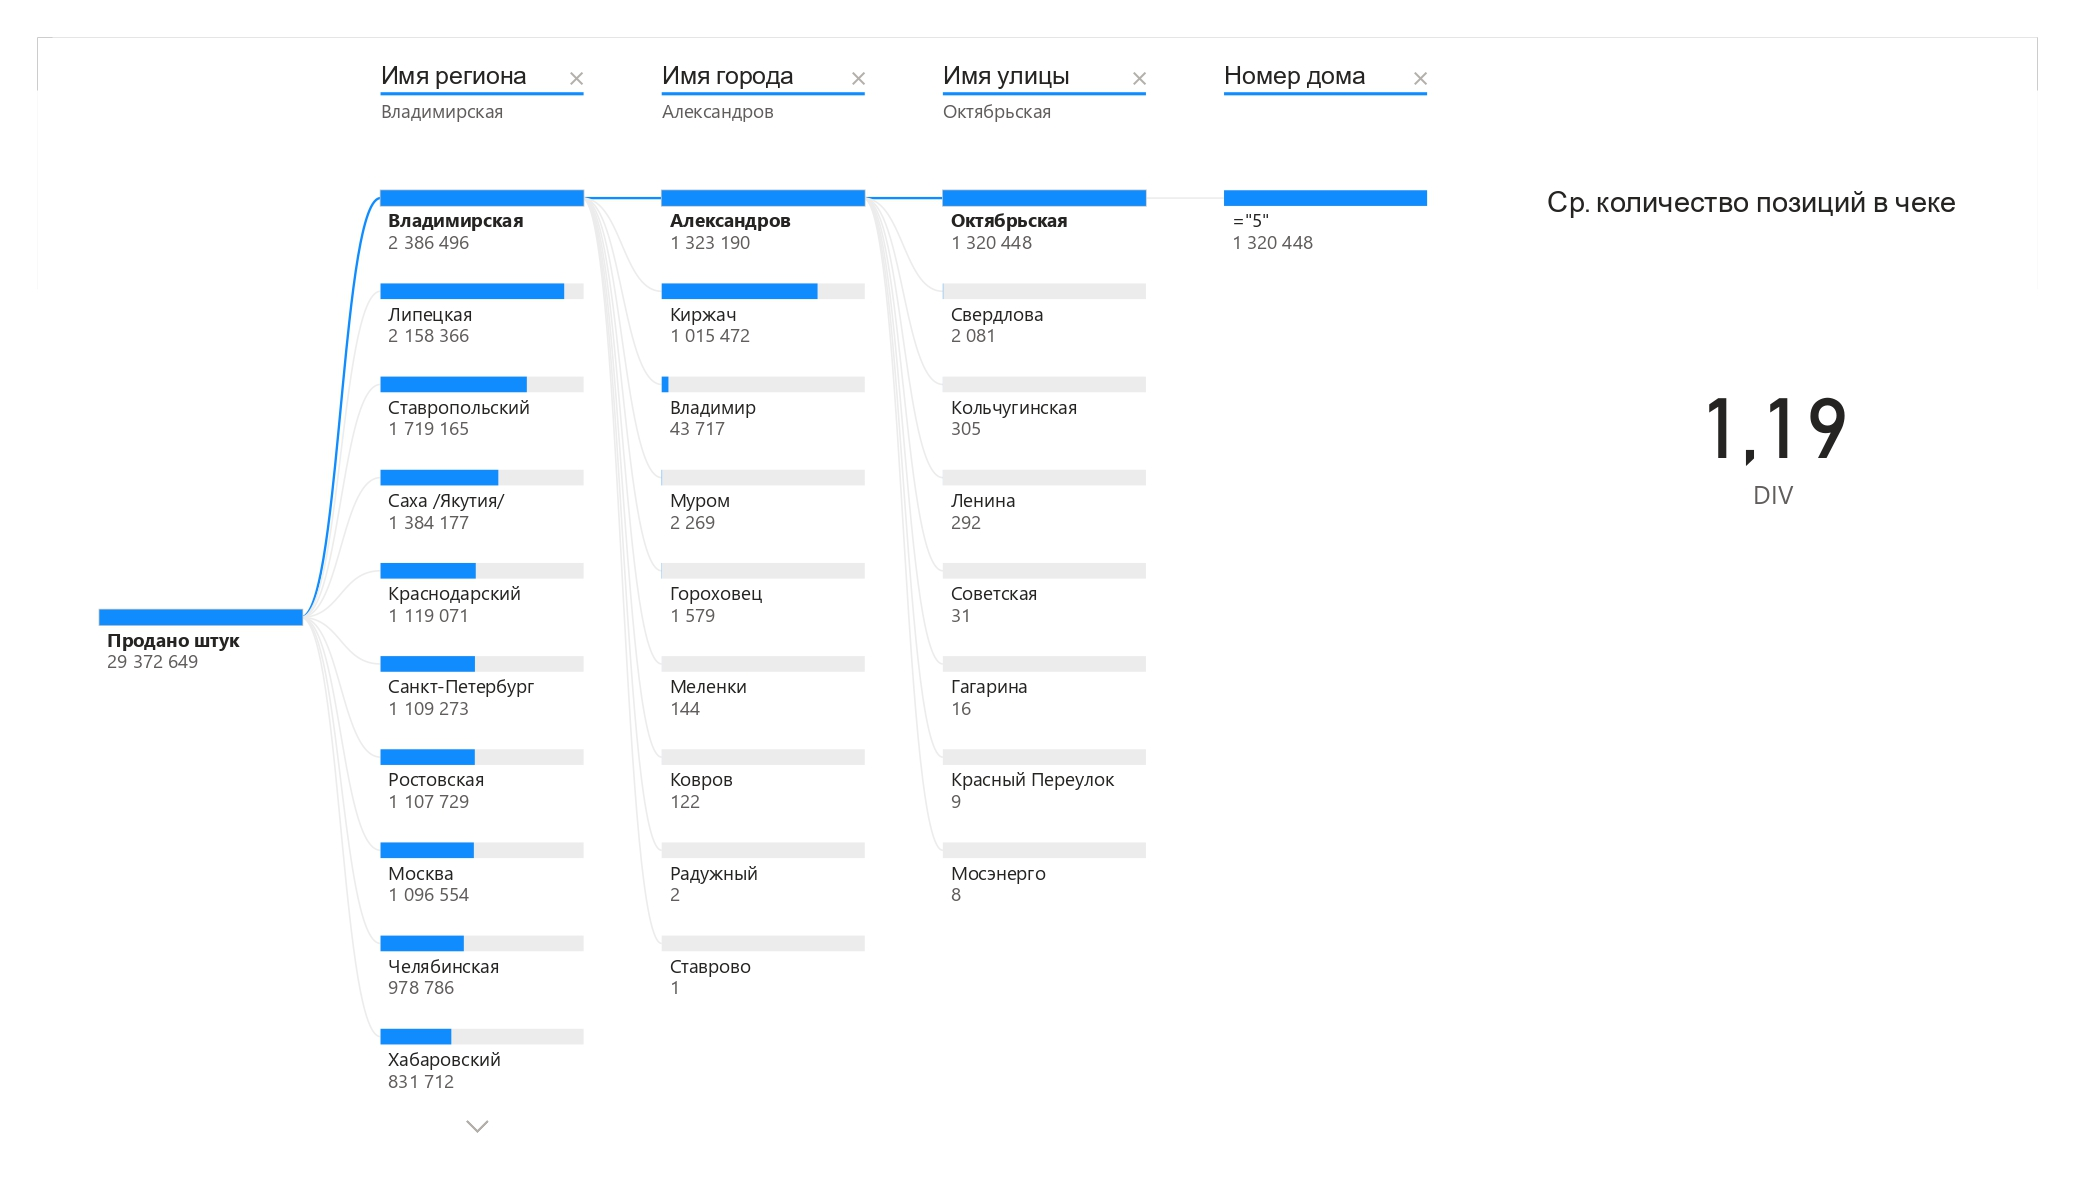

На следующем графике показан топ проданных продуктов по количеству штук, с возможностью фильтровать по региону и периоду.
Так как мы не обрабатывали наименования продуктов, то например, "яйцо куриное", в разных вариациях, встречается 4 раза.
На следующей итерации работы с данными нужно поработать с названиями продуктов - объединить похожие, убрать выбросы, объединить в группы.


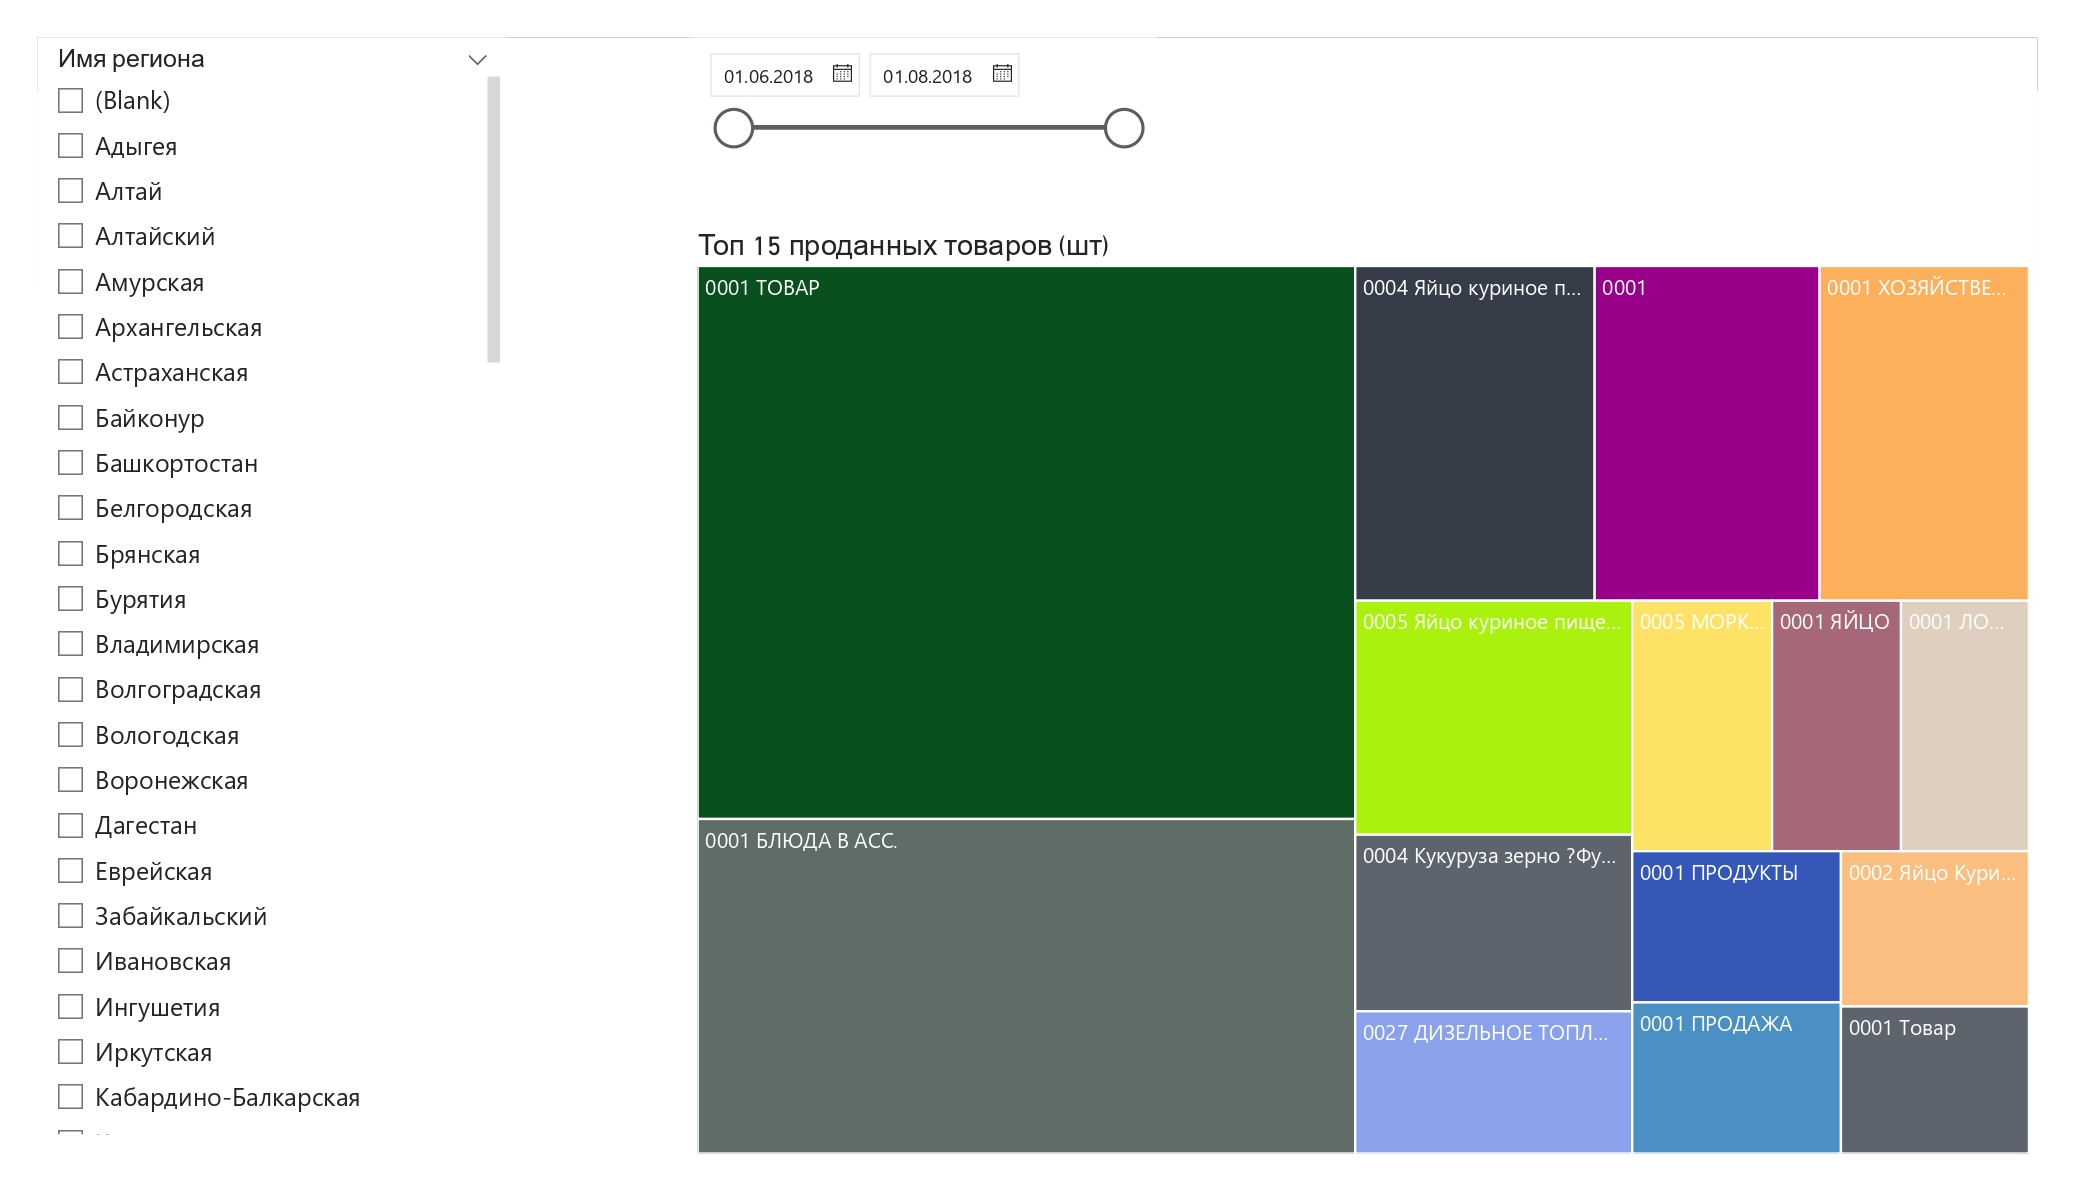

Идеи для дальнейшего анализа:
как говорилось ранее, необходимо "почистить" наименования продуктов (объединить похожие, добавить признак "группы товаров")
выяснить к какому региону относится регион 0